# **ANALYSIS OF E-COMMERCE MERCHANT DATAS**

# **PARTIE 1 - PRÉPARATION DU DATASET**

Avant de procéder à l'analyse du dataset, je vais réaliser l'étape de "nettoyage", destinée à préparer le terrain pour l'analyse. **L'objectif est de garantir la consistance des données au sein du dataset** pour éviter de se baser sur des données imprécises ou non significatives dans la phase d'analyse. Cette partie va donc consister en l'identification des données incomplètes, incorrectes, inexactes ou non pertinentes, puis à leur éventuel remplacement, modification ou suppression.

## **1.1. Importation des données**

Dans cette sous-partie, je vais dans un premier temps **importer les librairies** qui vont être utiles pour analyser le dataset. Par la suite, je vais **importer le fichier Excel** dans l'objectif d'obtenir une première vue globale sur sa composition et la signification des colonnes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set_palette("Set2")

In [2]:
data = pd.read_excel("/Users/tangigouez/Desktop/data.xlsx")

In [3]:
data.head()

,brand_name,category_0,category_1,category_2,customer_gender,id_flat_table,id_order,is_customer_amazon_2016,is_customer_amazon_2018,is_customer_cdiscount_2016,...,order_total_fees,order_total_paid,order_total_paid_price_range,order_total_promo,payment_method_name,product_description,product_name,rank_merchant_customer,seller_name,total_order_item_quantity_per_order
0,NaN,epicerie,"bieres, vins et spiritueux",bières,1.0,2229173,1116549,NaN,NaN,NaN,...,0.0,35.4,30 - 50,0.0,NaN,NaN,brasserie flying dog racing bitch biere ambree...,4,cdiscount,12
1,chateau maucaillou,epicerie,"bieres, vins et spiritueux",vin,2.0,1488372,740767,NaN,NaN,NaN,...,6.0,109.5,100 - 200,0.0,carte,NaN,"magnum, chateau maucaillou, 2015 - moulis aoc,...",8,chateau maucaillou,2
2,chateau maucaillou,epicerie,"bieres, vins et spiritueux",vin,2.0,1488375,740767,NaN,NaN,NaN,...,6.0,109.5,100 - 200,0.0,carte,NaN,"maucaillou haut-medoc, 2015, rouge - 6 x 75 cl...",8,chateau maucaillou,2
3,lunii,epicerie,"bieres, vins et spiritueux",NaN,1.0,2031228,1023897,NaN,NaN,NaN,...,0.0,59.9,50 - 100,0.0,carte,NaN,la fabrique a histoires - la fabrique a histoi...,3,lunii,1
4,bjorg,epicerie,"bieres, vins et spiritueux",NaN,2.0,2022298,1018952,1.0,NaN,NaN,...,17.0,154.3,100 - 200,0.0,carte,NaN,sel et herbes bio |250g - 2108,5,bjorg,13


In [4]:
data.tail()

,brand_name,category_0,category_1,category_2,customer_gender,id_flat_table,id_order,is_customer_amazon_2016,is_customer_amazon_2018,is_customer_cdiscount_2016,...,order_total_fees,order_total_paid,order_total_paid_price_range,order_total_promo,payment_method_name,product_description,product_name,rank_merchant_customer,seller_name,total_order_item_quantity_per_order
9734,chupa chups,epicerie,"bieres, vins et spiritueux",NaN,2.0,72898430,39920687,NaN,1.0,NaN,...,6.5,61.5,50 - 100,0.0,carte,NaN,persica peche - 210 pieces - 102881,10,chupa chups,7
9735,chupa chups,epicerie,"bieres, vins et spiritueux",NaN,2.0,72898470,39920687,NaN,1.0,NaN,...,6.5,61.5,50 - 100,0.0,carte,NaN,crocodiles - 210 pieces - 102873,10,chupa chups,7
9736,chupa chups,epicerie,"bieres, vins et spiritueux",NaN,2.0,72898512,39920687,NaN,1.0,NaN,...,6.5,61.5,50 - 100,0.0,carte,NaN,happy cherry - 105 pieces - 102904,10,chupa chups,7
9737,mixologie,epicerie,"bieres, vins et spiritueux",gin,1.0,72105295,39464336,1.0,1.0,NaN,...,4.0,41.0,30 - 50,0.0,carte,NaN,coffret gin gold 70 cl + 4 bouteilles de ledge...,3,mixologie,1
9738,NaN,epicerie,"bieres, vins et spiritueux",NaN,2.0,72482189,39701170,NaN,1.0,NaN,...,5.0,16.7,15 - 30,0.0,mastercard,kindle edition,what a time to be alone,8,momox,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9739 entries, 0 to 9738
Data columns (total 37 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   brand_name                                                 5723 non-null   object        
 1   category_0                                                 9739 non-null   object        
 2   category_1                                                 9739 non-null   object        
 3   category_2                                                 7425 non-null   object        
 4   customer_gender                                            9543 non-null   float64       
 5   id_flat_table                                              9739 non-null   int64         
 6   id_order                                                   9739 non-null   int64         
 7   is_customer_amazon_2016          

Le dataset contient au total **37 colonnes et 9739 lignes**. Parmi les colonnes, près de **65%** d'entre elles sont composées de données numériques (floats et integer confondus), **33%** sont composées d'objets et **3%** sont des données de type datetime. Nous pouvons également noter que certaines colonnes comprennent des données nulles.

Chaque ligne correspond à un article distinct dans commande réalisée par un client sur l'une des 3 plateformes de e-commerce suivantes : **Vente-privée, Amazon et Cdiscount**.

A première vue, d'après l'intitulé des colonnes, chaque ligne nous donne les informations suivantes à propos de la commande d'un article : 

- **Le client** : sexe (*customer_gender*) ;
- **La catégorie** à laquelle les articles commandés appartiennent (*category_0, category_1, category_2*) ;
- **Le produit** commandé : nom de la marque (*brand_name*), le nom du produit (*product_name*) et sa description (*product_description*) ;
- **La plateforme de e-commerce** sur laquelle l'article a été commandé (*merchant_name*);
- **Les paramètres de la commande** : le numéro de commande unique (*id_order*), le nombre d'articles commandés (*order_item_quantity, order_distinct_item_quantity, total_order_item_quantity_per_order*) et la date (*order_datetime*) ;
- **Le paiement de la commande** : la devise (*order_currency*) et la méthode de paiement (*payment_method_name*) ; 
- **Le prix** de la commande et les éventuelles **promotions** et **frais** associés (*order_total_price_paid, order_item_total_price_paid_price_range, order_item_total_price_paid_with_contributions, order_item_total_price_paid_with_contributions_coef, order_item_total_price_paid_with_contributions_ponderated, order_processing_fee, order_delivery_fee, order_total_fees, order_total_paid, order_total_promo*) 


D'autres colonnes disposent d'un nom à partir duquel nous ne pouvons pas affirmer avec certitude leur correspondance, **j'ai donc réalisé les hypothèses suivantes** : 
- *is_customer_merchantname_year* : les colonnes concernées correspondent potentiellement à une classification des clients, permettant notamment d'identifier si une commande d'article est reliée à un client qui a réalisé des achats sur d'autres sites marchands au cours de 2016 et 2018 (*is_customer_amazon_2016, is_customer_amazon_2018, is_customer_venteprivee_2016, is_customer_venteprivee_2018, is_customer_cdiscount_2016, is_customer_cdiscount_2018, merchant_name*);
- *rank_merchant_customer* : cette colonne désigne certainement le classement de l'article par la plateforme de e-commerce dans la catégorie à laquelle il appartient parmi les autres annonces du même type ; 
- *order_item_is_marketplace* : cette colonne devrait nous permettre d'identifier si l'article commandé provient de la marketplace directement ou d'un vendeur tiers ; 
- *order_item_total_price_paid_with_contributions* : je déduis de l'intitulé de cette colonne qu'une contribution correspond à la commission payée par le vendeur au site marchand lors de la vente de l'article, rémunérant ainsi la plateforme qui a permis la réalisation de la commande ;
- *order_item_total_price_paid_with_contributions_coef* : nous étudierons la signification de cette colonne dans les étapes à suivre pour comprendre les paramètres de ce coefficient
- La différence entre *id_flat_table* et *order_id* reste à préciser.

Nous apprendrons à mieux connaitre le dataset grâce aux étapes suivantes. Je pourrais ainsi **confirmer ou non** ces premières hypothèses réalisées sur l'utilité des colonnes listées ci-dessus.

## **1.2. Identification des données manquantes**

L'objectif de cette partie est d'identifier les données manquantes par colonne et d'arbitrer l'éventuelle nécessité de supprimer ou modifier la donnée concernée.

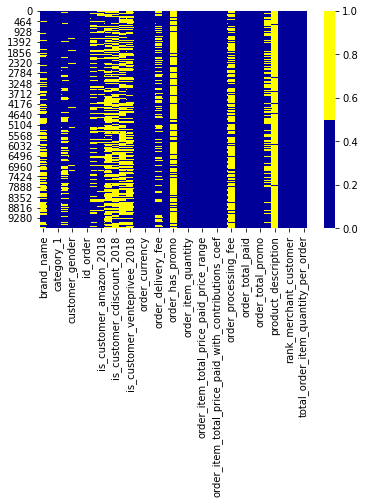

In [6]:
colours = ['#000099', '#ffff00']
sns.heatmap(data.isnull(), cmap=sns.color_palette(colours))

Le graphique ci-dessus visualise les **données manquantes** par colonne à l'aide de la couleur **jaune**. Il nous permet d'obtenir une première vue d'ensemble sur les colonnes présentant des valeurs non définies. Afin d'avoir plus de granularité sur la proportion de données manquantes par colonne, nous allons compléter ce graphique par le **calcul de leur proportion au sein de chaque colonne**.  

In [7]:
col_name = []
col_pct_missing = []
for col in data.columns:
    col_name.append(col)
    pct_missing = np.mean(data[col].isnull())
    col_pct_missing.append('{}%'.format(round(pct_missing*100,2)))
    
df_col_missing = pd.DataFrame({ 'columns' : col_name,
                            'pct_missing' : col_pct_missing
                           })
df_col_missing.set_index('columns')

,pct_missing
columns,
brand_name,41.24%
category_0,0.0%
category_1,0.0%
category_2,23.76%
customer_gender,2.01%
id_flat_table,0.0%
id_order,0.0%
is_customer_amazon_2016,32.49%
is_customer_amazon_2018,18.22%


Certaines colonnes présentent une **proportion élevée de données manquantes**. Nous allons les explorer plus en profondeur.

Tout d'abord, la colonne *product_description*, disposant de près de **97% de données manquantes** ne semble pas essentielle à notre analyse. De même pour les colonnes *order_processing_fee* et *order_has_promo* qui disposent respectivement de **85% et 74% de données manquantes**. De part leur manque de représentativité, nous allons supprimer ces 3 colonnes.

D'autres colonnes, comme *order_delivery_fee*, *brand_name* ont respectivement **38% et 42% de valeurs manquantes**. Pour le moment nous conserverons ces colonnes car elles peuvent d'avérer utiles pour l'analyse à venir. De même, malgré que les colonnes *is_customer_merchantname_year* présentent chacune une proportion importante de données manquantes, ces colonnes étant composées de "1.0", "client", et de valeurs NaN, nous pouvons faire l'hypothèse que NaN revient à "0.0 et donc à "non client".

In [8]:
data = data.drop(columns=['product_description','order_has_promo','order_processing_fee'])

## **1.3. Identification des données répétitives**

Dans cette section, nous allons vérifier si certaines colonnes manque de pertinence en raison d'un nombre trop important de valeurs identiques, n'apportant donc aucune valeur ajoutée. Je vais donc identifier les éventuelles colonnes qui présentent un **pourcentage de similitude supérieur à 90%**.

In [9]:
num_rows = len(data.index)
low_information_cols = [] #
low_information_cols_pct_rep = []

for col in data.columns:
    cnts = data[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.90:
        low_information_cols.append(col)
        low_information_cols_pct_rep.append('{:.2f}%'.format(top_pct*100))
        
df_repetitive_cols = pd.DataFrame({ 'columns' : low_information_cols,
                            'pct_similarity' : low_information_cols_pct_rep
                           })
df_repetitive_cols.set_index('columns')

,pct_similarity
columns,
category_0,100.00%
category_1,100.00%


Nous pouvons clairement identifier que les colonnes *category_0* et *category_1* n'apportent aucune valeur ajoutée pour notre analyse puisqu'elles ne contiennent **qu'une seule et unique valeur**. Nous allons donc les supprimer.

Cependant, nous pouvons tirer une information importante de cette observation : l'ensemble des articles commandés référencées dans le dataset **appartiennent à la catégorie épicerie et plus précisément des "bières, vins et spiritueux"**.

In [10]:
data = data.drop(columns=['category_0','category_1'])

## **1.4. Identification des données erronnées**

Dans cette sous-partie nous allons rentrer plus en profondeur dans le contenu des colonnes pour vérifier qu'elles ne contiennent pas d'erreurs. L'objectif est de **garantir la consistance des données de chaque commande** pour notre analyse à venir.

## 1.4.1. Etude des colonnes *is_customer_merchantname_year*

Chaque ligne du dataset correspond aux informations d'un article commandé sur **un site marchand** à une **date précise**. En parallèle, d'après mes hypothèses, le dataset nous donne également des informations sur le client par l'intermédiaire des colonnes *is_customer_merchantname_year*, détaillant si l'auteur de la commande est aussi client sur les autres sites marchands, et ce sur les années 2016 et 2018. 

Pour vérifier notre hypothèse, vérifions par exemple si des articles commandés concernent des clients qui ont commandé des articles sur les 3 sites marchands au cours de l'année 2016.

In [11]:
keys_1 = (data['is_customer_amazon_2016'] == 1.0) & (data['is_customer_cdiscount_2016'] == 1.0) & (data['is_customer_venteprivee_2016']) 

In [12]:
data[keys_1]

,brand_name,category_2,customer_gender,id_flat_table,id_order,is_customer_amazon_2016,is_customer_amazon_2018,is_customer_cdiscount_2016,is_customer_cdiscount_2018,is_customer_venteprivee_2016,...,order_item_total_price_paid_with_contributions_ponderated,order_total_fees,order_total_paid,order_total_paid_price_range,order_total_promo,payment_method_name,product_name,rank_merchant_customer,seller_name,total_order_item_quantity_per_order
29,vins grands formats,vin,1.0,5344411,2528546,1.0,NaN,1.0,NaN,1.0,...,12.5,6.0,25.0,15 - 30,0.0,carte,"magnum de cahors, rouge 2014| heritage de mass...",1,vins grands formats,1
30,lorgeril,vin,1.0,4815121,2295727,1.0,NaN,1.0,NaN,1.0,...,25.2,10.0,94.0,50 - 100,0.0,carte,"pinot noir, le saint jean, pays d'oc, rouge, 2...",1,lorgeril,2
98,nikka,whisky,2.0,1333448,661337,1.0,1.0,1.0,NaN,1.0,...,103.7,0.0,39.9,30 - 50,0.0,NaN,nikka from barrel 50 cl 51.4deg - 1,3,cdiscount,1
99,rhum j.m,rhum,2.0,1532841,762565,1.0,1.0,1.0,NaN,1.0,...,23.1,4.5,38.5,30 - 50,0.0,carte,rhum single cask millesime 2008 - 50 cl,3,vente-privee,1
100,bjorg,NaN,2.0,1532922,762607,1.0,1.0,1.0,NaN,1.0,...,1.7,12.0,113.9,100 - 200,0.0,carte,sel et herbes bio |250g - 2108,1,bjorg,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9724,vins du sud-ouest,vin,2.0,72626351,39776812,1.0,1.0,1.0,1.0,1.0,...,49.7,14.0,149.0,100 - 200,0.0,carte,"domaine du mioula, marcillac, rouge 2013|1 x 7...",19,vins du sud-ouest,24
9725,mouton cadet,vin,2.0,72626414,39776832,1.0,1.0,1.0,1.0,1.0,...,50.8,10.0,88.0,50 - 100,0.0,carte,"bordeaux, mouton cadet, rouge 2012 |75 cl - 32...",17,mouton cadet,12
9726,mouton cadet,vin,2.0,72626429,39776832,1.0,1.0,1.0,1.0,1.0,...,37.2,10.0,88.0,50 - 100,0.0,carte,"cabernet sauvignon, casillero del diablo, roug...",17,mouton cadet,12
9727,chateau meric,vin,2.0,72626446,39776837,1.0,1.0,1.0,1.0,1.0,...,118.0,10.0,118.0,100 - 200,0.0,carte,medoc cru bourgeois aoc - 2012 - rouge - 75 cl,16,vente-privee,12


**1185** articles commandés concernent des clients qui ont réalisé des achats sur les **3 sites marchands** en **2016** (attention plusieurs articles commandés peuvent concerner la même commande et donc le même client). Vérifions s'il est également possible que des clients aient commandé sur un même site marchand en **2016 et en 2018**, par exemple sur **Amazon**.

In [13]:
keys_2 = ((data['is_customer_amazon_2016'] == 1.0) & (data['is_customer_amazon_2018'] == 1.0))

In [14]:
data[keys_2]

,brand_name,category_2,customer_gender,id_flat_table,id_order,is_customer_amazon_2016,is_customer_amazon_2018,is_customer_cdiscount_2016,is_customer_cdiscount_2018,is_customer_venteprivee_2016,...,order_item_total_price_paid_with_contributions_ponderated,order_total_fees,order_total_paid,order_total_paid_price_range,order_total_promo,payment_method_name,product_name,rank_merchant_customer,seller_name,total_order_item_quantity_per_order
95,crazy horse,champagne & crémants,2.0,1645486,820206,1.0,1.0,NaN,NaN,1.0,...,390.0,0.0,150.0,100 - 200,0.0,carte,billet open - show + 1/2 bouteille de champagn...,1,crazy horse,2
96,jose cuervo,autres & liqueurs,1.0,1751808,879531,1.0,1.0,1.0,NaN,NaN,...,40.0,0.0,29.9,15 - 30,0.0,visa,jose cuervo tequila jose cuervo reposado 70 cl,10,amazon,2
97,NaN,NaN,1.0,2034296,1025905,1.0,1.0,NaN,NaN,NaN,...,34.4,10.5,68.8,50 - 100,0.0,visa,arcane - extraroma en coffret 2 verres,5,excellencerhum,1
98,nikka,whisky,2.0,1333448,661337,1.0,1.0,1.0,NaN,1.0,...,103.7,0.0,39.9,30 - 50,0.0,NaN,nikka from barrel 50 cl 51.4deg - 1,3,cdiscount,1
99,rhum j.m,rhum,2.0,1532841,762565,1.0,1.0,1.0,NaN,1.0,...,23.1,4.5,38.5,30 - 50,0.0,carte,rhum single cask millesime 2008 - 50 cl,3,vente-privee,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9729,foire aux vins,vin,1.0,72862470,39896338,1.0,1.0,1.0,1.0,1.0,...,31.0,6.0,62.0,50 - 100,10.0,carte,"roccheviberti|barbera d'alba doc, italie, vign...",9,foire aux vins,2
9730,NaN,whisky,1.0,72893916,39916163,1.0,1.0,NaN,NaN,NaN,...,22.5,0.0,254.3,200 - 500,0.0,amex,nikka whisky from the barrel 50 cl,47,vvs drinks,5
9731,NaN,rhum,1.0,72893979,39916163,1.0,1.0,NaN,NaN,NaN,...,19.5,0.0,254.3,200 - 500,0.0,amex,don papa rhum 70 cl,47,vvs drinks,5
9732,NaN,rhum,1.0,72903996,39922326,1.0,1.0,NaN,NaN,NaN,...,36.7,9.5,73.4,50 - 100,0.0,visa,damoiseau vieux avec emballage cadeau xo rhum ...,2,la boutique du comptoir,1


C'est en effet bien le cas, **6063** articles commandés sont liés à des clients qui ont été clients d'Amazon en 2016 et en 2018. Cette phase d'observation nous a permis de mieux comprendre la potentielle utilité de ces colonnes. Elles pourront notamment nous être utiles dans le calcul de la part de portefeuille.

## 1.4.2. Etude des doublons de commandes 

A présent, nous allons vérifier si le dataset **ne contient pas de doublons** au niveau des commandes d'articles. Pour les identifier, nous allons **combiner plusieurs critères** qui ensemble peuvent être définis comme uniques pour une transaction. Ainsi, j'ai choisi de combiner les critères suivants : 
- La date de la transaction 
- Le numéro de commande
- Le montant total de la commande payé
- La quantité d'articles commandés
- Le nom du produit commandé

En effet, la probabilité de l'occurence de plusieurs commandes avec l'ensemble ces critères réunis à l'identique est **quasiment nulle**. 

In [15]:
keys_3 = ['order_datetime', 'id_order', 'order_total_paid','order_item_quantity','product_name']

In [16]:
data.fillna(-999).groupby(keys_3)['id_flat_table'].count().sort_values(ascending=False).head(20)

order_datetime  id_order  order_total_paid  order_item_quantity  product_name                                                                                                                                                                                
2016-05-03      36021664  95.0              1                    dors-bien | rouge                                                                                                                                                                               2
2018-02-22      7660831   297.8             1                    boite 6 flutes canard duchene                                                                                                                                                                   2
2018-01-21      7660836   388.9             1                    boite 6 flutes canard duchene                                                                                                                                      

Nous pouvons observer que sur la base de la combinaison de ces critères, le dataset contient **11 doublons** que nous allons supprimer.

In [17]:
data = data.drop_duplicates(subset=keys_3)

## 1.4.3. Etudes des données de prix

Le dataset contient plusieurs colonnes donnant des informations sur la **décomposition du prix d'une commande** :
- *order_item_total_price_paid*
- *order_item_total_price_paid_with_contributions*
- *order_item_total_price_paid_with_contributions_coef*
- *order_item_total_price_paid_with_contributions_ponderated*
- *order_total_paid*

A priori, d'après le nom des colonnes, une commande réalisée sur l'une des 3 marketplaces est susceptible de comprendre une **contribution** en plus du prix de l'article vendu, au titre de la rémunération de la plateforme pour le référencement de l'article. Puis, le nouveau prix comprenant la contribution serait **pondéré** pour générer un nouveau prix. 

Explorons ces colonnes plus en détail pour bien comprendre leur mode de calcul et les paramètres qui les influencent. En effet, la bonne compréhension de ces éléments va notamment impacter **notre évaluation des parts de marché en valeur de chaque marchant**.

Par ailleurs, je fais l'hypothèse d'après les intitulés de commande que le **montant de la contribution payée par le vendeur de l'article à la marketplace** se calcule de la manière suivante : *contributions* = *order_item_total_price_paid_with_contributions* - *order_item_total_price_paid* et donc que le pourcentage de contribution d'établit comme suit : *% contributions* = *contributions* / *order_item_total_price_paid*.

Théoriquement, il serait logique d'observer une contribution dans le prix de vente de la marchandise **lorsque le vendeur de la marchandise (*seller_name*) diffère du site marchand (apparaissant dans la colonne *merchant_name*)** (nommés *vendeurs non marchands* par la suite). Vérifions si c'est bien le cas. 

In [18]:
non_mktplace_seller = data[(data['seller_name']!= 'amazon') & (data['seller_name']!= 'cdiscount') & (data['seller_name']!= 'vente-privee')]
non_mktplace_seller['contribution'] = non_mktplace_seller['order_item_total_price_paid_with_contributions'] - non_mktplace_seller['order_item_total_price_paid']

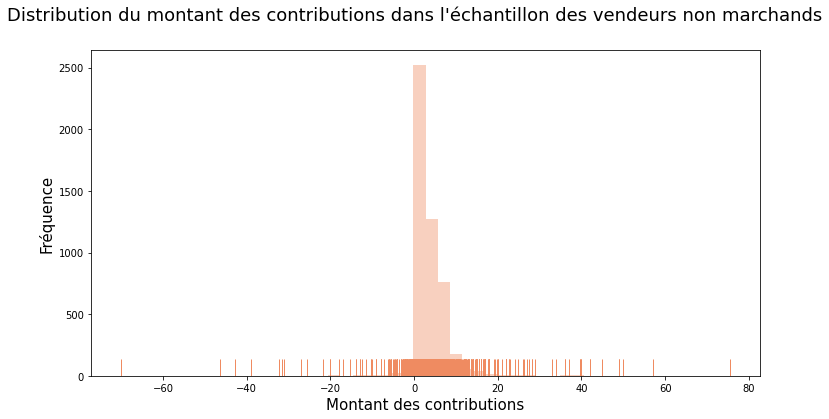

In [19]:
plt.figure(figsize=(12,6))
fig = sns.distplot(non_mktplace_seller['contribution'], kde=False, rug=True, color = '#EF8B61')
fig.figure.suptitle("Distribution du montant des contributions dans l'échantillon des vendeurs non marchands", fontsize = 18) 
plt.xlabel('Montant des contributions', fontsize=15) 
plt.ylabel('Fréquence', fontsize=15) 
plt.show()

In [20]:
contributions_pos = (non_mktplace_seller[non_mktplace_seller['contribution'] > 0]['contribution'].count()/(non_mktplace_seller['contribution'].count()))*100
contributions_nulles = (non_mktplace_seller[non_mktplace_seller['contribution'] == 0]['contribution'].count()/(non_mktplace_seller['contribution'].count()))*100
contributions_neg = (non_mktplace_seller[non_mktplace_seller['contribution'] < 0]['contribution'].count()/(non_mktplace_seller['contribution'].count()))*100
df_contributions_non_mktplace_seller_pct = pd.DataFrame({ 'Positives' : contributions_pos, 'Nulles' : contributions_nulles,
                            'Négatives' : contributions_neg
                           }, index=[0])

<Figure size 864x432 with 0 Axes>

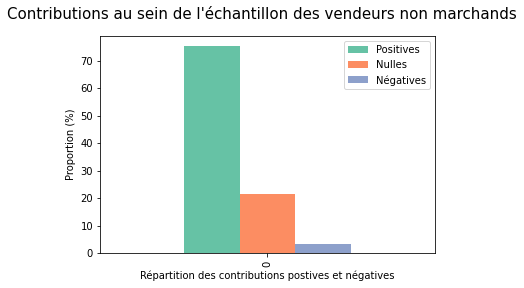

In [21]:
plt.figure(figsize=(12,6))
fig = df_contributions_non_mktplace_seller_pct.plot.bar()
fig.figure.suptitle("Contributions au sein de l'échantillon des vendeurs non marchands", fontsize = 15) 
plt.xlabel('Répartition des contributions postives et négatives',fontsize = 10)
plt.ylabel('Proportion (%)',fontsize = 10)
plt.show()

In [22]:
df_contributions_non_mktplace_seller_pct

,Positives,Nulles,Négatives
0,75.308396,21.468365,3.223239


In [23]:
non_mktplace_seller['contribution'].describe()

count    5026.000000
mean        3.111142
std         4.730688
min       -70.000000
25%         0.200000
50%         2.500000
75%         5.000000
max        75.500000
Name: contribution, dtype: float64

Les statistiques ci-dessus décrivent le montant des contributions dans **l'échantillon des vendeurs non marchands**. Les contributions sont d'une valeur moyenne de environ **3€** par article commandé.

En revanche, on constate **la présence de contributions négatives** à l'aide du graphique de distribution ci-dessus. Par définition, une contribution ne peut pas être négative car cela signifierait que le site marchand paye le vendeur pour référencer ses produits ce qui va à l'encontre de son business model. Parmi l'échantillon, **162 articles commandés** présentent des contributions négatives, soit **3,22% de l'échantillon**. Maintenant, regardons de plus près ce qu'il en est pour les articles vendus par les marketplaces directement pour vérifier si notre hypothèse est vérifiée.

In [24]:
seller_vp = data[(data['seller_name']=='vente-privee')]
seller_amz = data[(data['seller_name']=='amazon')]
seller_cdiscount = data[(data['seller_name']=='cdiscount')]
mktplace_seller = pd.concat([seller_vp,seller_amz,seller_cdiscount])

In [25]:
mktplace_seller['contribution'] = mktplace_seller['order_item_total_price_paid_with_contributions'] - mktplace_seller['order_item_total_price_paid']

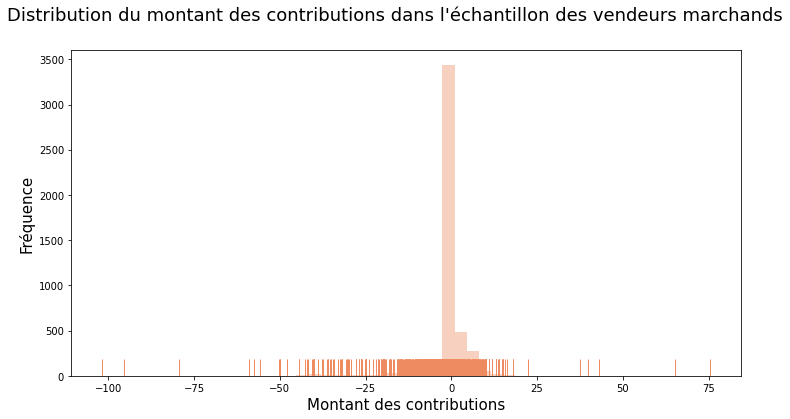

In [26]:
plt.figure(figsize=(12,6))
fig = sns.distplot(mktplace_seller['contribution'], kde=False, rug=True, color = '#EF8B61')
fig.figure.suptitle("Distribution du montant des contributions dans l'échantillon des vendeurs marchands", fontsize = 18) 
plt.xlabel('Montant des contributions', fontsize=15) 
plt.ylabel('Fréquence', fontsize=15) 
plt.show()

In [27]:
mktplace_seller['contribution'].describe()

count    4702.000000
mean       -0.560315
std         6.518024
min      -102.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        75.500000
Name: contribution, dtype: float64

In [28]:
contributions_pos_1 = (mktplace_seller[mktplace_seller['contribution'] > 0]['contribution'].count()/(mktplace_seller['contribution'].count()))*100
contributions_nulles_1 = (mktplace_seller[mktplace_seller['contribution'] == 0]['contribution'].count()/(mktplace_seller['contribution'].count())*100)
contributions_neg_1 = (mktplace_seller[mktplace_seller['contribution'] < 0]['contribution'].count()/(mktplace_seller['contribution'].count())*100)
df_contributions_mktplace_seller_pct = pd.DataFrame({ 'Positives' : contributions_pos_1, "Nulles" : contributions_nulles_1,
                            'Négatives' : contributions_neg_1
                           }, index=[0])

<Figure size 864x432 with 0 Axes>

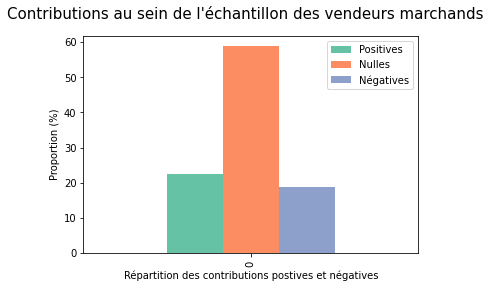

In [29]:
plt.figure(figsize=(12,6))
fig = df_contributions_mktplace_seller_pct.plot.bar()
fig.figure.suptitle("Contributions au sein de l'échantillon des vendeurs marchands", fontsize = 15) 
plt.xlabel('Répartition des contributions postives et négatives',fontsize = 10)
plt.ylabel('Proportion (%)',fontsize = 10)
plt.show()

In [30]:
df_contributions_mktplace_seller_pct

,Positives,Nulles,Négatives
0,22.394726,58.889834,18.71544


Les statistiques ci-dessus décrivent le montant des contributions dans **l'échantillon des vendeurs marchands**.

Sans surprise nous observons grâce au graphique de distribution ci-dessus que le nombre d'articles commandés avec une **contribution nulle** pour cet échantillon est majoritaire (**59% de l'échantillon**), appuyant donc notre hypothèse de départ.

En revanche, nous observons qu'un certain nombre d'articles vendus présente des commissions négatives au sein de l'échantillon, justifiant notamment la valeur moyenne des contributions de l'échantillon à hauteur de **-0,56€** par article commandé. De même que pour l'échantillon des vendeurs non marchands, il n'est pas logique de constater des contributions négatives. **880 articles commandés** sont concernés par ce défaut au sein de l'échantillon.

D'autre part, nous pouvons observer également des **contributions positives** pour l'échantillon des vendeurs marchands (**22% de l'échantillon**). Ce paramètre ne semble pas logique selon notre approche. Cependant, au risque de supprimer un nombre trop important de données, nous n'allons pas les supprimer ou les modifier pour rester conservateurs.

Au global, parmi les deux échantillons combinés, **1042 articles commandés** (**11% du dataset**) présentent des commissions négatives. 

Avant d'envisager de supprimer ces données de commande, explorons plus en détail **le coefficient de pondération** appliqué au prix comprenant les contributions afin de vérifier s'il ajuste les articles commandés présentant des contributions négatives. Nous chercherons également à comprendre **les paramètres qui le définisse** et son importance dans le calcul du prix final.

## 1.4.4. Etude du coefficient de pondération appliqué au prix commissionné

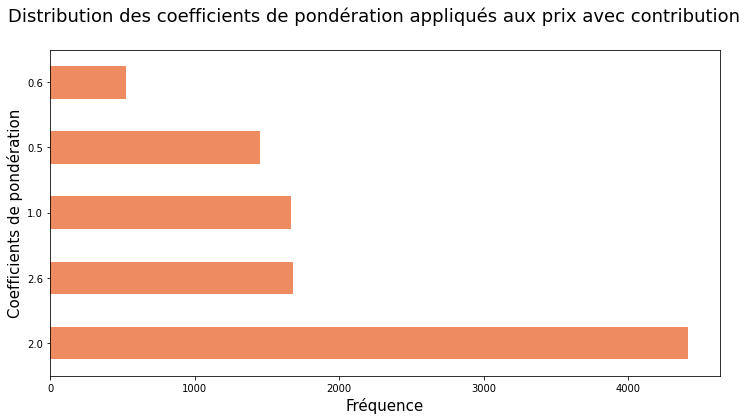

In [31]:
plt.figure(figsize=(12,6))
fig = data['order_item_total_price_paid_with_contributions_coef'].value_counts().plot(kind='barh', color = '#EF8B61')
fig.figure.suptitle("Distribution des coefficients de pondération appliqués aux prix avec contribution", fontsize = 18) 
plt.xlabel('Fréquence', fontsize=15) 
plt.ylabel('Coefficients de pondération', fontsize=15) 
plt.show()

Au sein du dataset, nous pouvons oberver qu'il existe **5 coefficients de pondération** différents appliqués au prix avec contribution, respectivement par **ordre de fréquence** : 2.0, 2.6, 1.0, 0.5 et 0.6.

Pour mieux comprendre les paramètres déterminant le choix du coefficient appliqué à un prix, j'ai choisi d'évaluer les hypothèses suivantes :  
- **Hypothèse 1 :** La sous-catégorie auquel l'article commandé appartient (*category_2*). On pourrait imaginer que certains produits coûtent plus cher au référencement sur une plateforme de e-commerce en raison de leurs caractéristiques, justifiant une pondération du prix avec contribution plus élevé ;
- **Hypothèse 2 :** La rangée de prix dans laquelle la commande s'inscrit (*order_total_paid_price_range*). Dans cette hypothèse, on suppose que la pondération de prix avec constribution augmente avec le prix de l'article commandé ;

### 1.4.1.1. Vue d'ensemble

Tout d'abord, prenons un peu de recul à l'aide de cette matrice évaluant la corrélation entre chacune des variables du dataset. Plus la couleur de l'intersection est **verte foncée**, plus les deux variables sont corrélées **positivement**. Inversement, plus la couleur est **rouge foncée**, plus les variables sont corrélées **négativement**. 

In [32]:
corr_table = data.loc[:, ~data.columns.isin(['is_customer_amazon_2016','is_customer_amazon_2018','is_customer_cdiscount_2016','is_customer_cdiscount_2018','is_customer_venteprivee_2016','is_customer_venteprivee_2018'])]
corr = corr_table.corr()

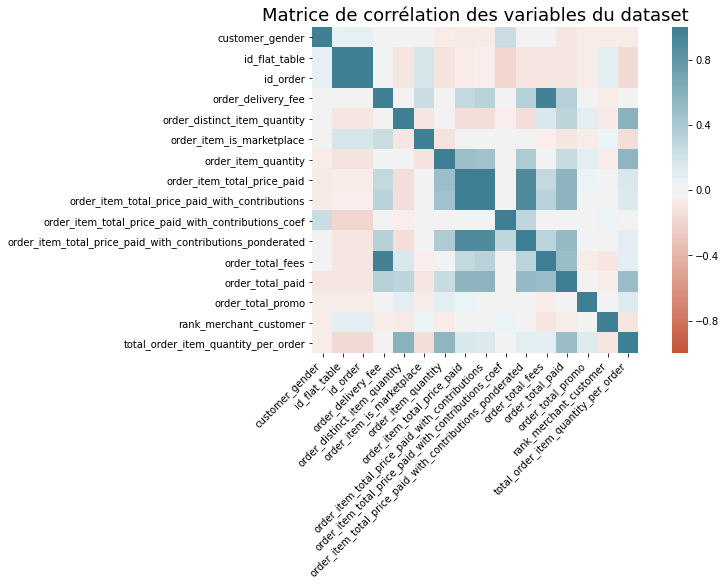

In [33]:
plt.figure(figsize=(12,6))
fig = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
fig.set_xticklabels(
    fig.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')
fig.set_title('Matrice de corrélation des variables du dataset', fontsize = 18)
plt.show()

A première vue, d'après la matrice ci-dessus, **aucune des variables du dataset ne semble être directement corrélée à l'évolution du coefficient de pondération**. Allons plus loin en testant nos hypothèses.

### 1.4.1.2. Test des hypothèses

#### Hypothèse 1

Vérifions si l'une des 5 pondérations est systématiquement appliquée à chaque catégorie. Prenons l'exemple des articles commandés appartenant à la **sous-catégorie des bières**.

In [34]:
h1 = data[data['category_2']== 'bières']['order_item_total_price_paid_with_contributions_coef'].value_counts()

In [35]:
df_h1 = pd.DataFrame({"Nombre d'articles": h1})
df_h1

,Nombre d'articles
2.0,238
1.0,99
0.5,92
2.6,69
0.6,27


Nous pouvons constater que plusieurs coefficients de pondération peuvent être appliqués pour une même sous-catégorie. Inutile d'aller plus loin dans l'étude de la corrélation entre ces variables. **La première hypothèse est donc rejetée**.

#### Hypothèse 2

Etudions à présent la seconde hypothèse. Nous cherchons à évaluer si le coefficient de pondération évolue selon la rangée de prix dans laquelle s'inscrit un article commandé. Prenons l'exemple des articles commandés dont le prix s'étalonne entre **50€ - 100€**, puis **0€ - 15€**.

In [36]:
h2 = data[data['order_total_paid_price_range']== '50 - 100']['order_item_total_price_paid_with_contributions_coef'].value_counts()

In [37]:
h2_bis = data[data['order_total_paid_price_range']== '0 - 15']['order_item_total_price_paid_with_contributions_coef'].value_counts()

In [38]:
df_h2 = pd.DataFrame({"0 - 15": h2_bis,
                      "50 - 100": h2
                     })
df_h2

,0 - 15,50 - 100
0.5,108,410
0.6,42,133
1.0,141,399
2.0,350,1159
2.6,145,468


Nous pouvons constater qu'il existe plusieurs pondérations pour une même rangée de prix. En effet, les 5 coefficients sont appliqués dans nos deux exemples. **La seconde hypothèse est donc rejetée**.

En conclusion, malgré les deux hypothèses émises ci-dessus, je n'ai pas identifié les déterminants du coefficient du pondération appliqué au prix avec constribution d'une commande. J'ai donc choisi **d'exclure ce paramètre de l'analyse**, au risque de fausser mon interprétation des prix avec contribution pondérés. 

Pour gagner en lisibilité, je vais **supprimer les colonnes relatives à ce coefficient de pondération** (*order_item_total_price_paid_with_contributions_coef* et *order_item_total_price_paid_with_contributions_ponderated*).

In [39]:
data = data.drop(columns=['order_item_total_price_paid_with_contributions_coef','order_item_total_price_paid_with_contributions_ponderated'])

Dans cette optique, je vais compléter le dataset d'origine en **rajoutant une colonne dédiée au calcul des contributions (non pondérées) par article commandé, ainsi qu'une autre colonne calculant le pourcentage de contribution par article commandé**. J'ai préféré opter pour cette approche, n'ayant pas le détail de la colonne total fees, qui pourrait comprendre des coûts autres que les contributions et les frais de livraison.

In [40]:
data['contributions'] = data['order_item_total_price_paid_with_contributions'] - data['order_item_total_price_paid']

In [41]:
data['coef_contributions (%)'] = round((data['contributions']/data['order_item_total_price_paid_with_contributions'])*100,3)

Dans l'étude des données de prix, nous avons pu noter que certaines commandes comprenaient des contributions négatives. **Cet élément n'étant pas cohérent avec la réalité, j'ai choisi de supprimer du dataset les données de commande concernées par ce défaut**.

In [42]:
data = data[data['contributions'] >= 0]

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8686 entries, 0 to 9738
Data columns (total 32 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   brand_name                                      5306 non-null   object        
 1   category_2                                      6513 non-null   object        
 2   customer_gender                                 8505 non-null   float64       
 3   id_flat_table                                   8686 non-null   int64         
 4   id_order                                        8686 non-null   int64         
 5   is_customer_amazon_2016                         5815 non-null   float64       
 6   is_customer_amazon_2018                         7062 non-null   float64       
 7   is_customer_cdiscount_2016                      3081 non-null   float64       
 8   is_customer_cdiscount_2018                      

Et voici ! Le dataset est prêt pour l'analyse. Il contient désormais **32 colonnes et 8686 lignes non défectueuses**. 

# **PARTIE 2 - ANALYSE DU DATASET**

## **2.1. Question 1** : *Quelles sont les parts de marché des acteurs en présence ? Quels sont les drivers de leur évolution ?*

Pour le calcul des parts de marché des acteurs en présence, nous retiendrons les deux méthodes suivantes :

- **Part de marché en volume** = (Nombre d'unités vendues par le site marchand) / (Nombre d'unités vendues par l’ensemble des sites marchands sur le marché)
- **Part de marché en valeur** = (Chiffre d’affaires du site marchand) / (Chiffre d’affaires total de tous les sites marchands sur le marché)

Etant donné la consitution du dataset, nous considérons que le **marché des sites marchands réalisant de la vente en ligne dans la catégorie épicerie** est constitué uniquement d'Amazon, Vente-privée et Cdiscount.

Pour le calcul des parts de marché en volume, nous nous baserons sur les données de la colonne suivante : *total_order_item_quantity_per_order* qui nous informe sur le nombre total d'articles par commande.

Concernant le calcul des parts de marché en valeur, il nous faudra décomposer le calcul. En effet, Amazon, Cdiscount et Vente-privée sont des **plateformes hybrides** qui combinent **e-commerce classique et marketplace**. Leur chiffre d'affaires correspond donc à la **somme des ventes réalisées en direct** (e-commerce classique) et des **commissions prélevées sur les transactions réalisées via la marketplace**.

Nous allons procéder aux calculs en distinguant les données respectivement relatives à l'année **2016 et 2018**. Pour faciliter les calculs, j'ai construit 6 masques sur la base de la combinaison des colonnes *merchant_name* et *order_datetime* pour identifier les données relatives à un site marchand sur une 2016 et 2018.

In [44]:
mask_amazon_2016 = ((data['merchant_name'] == 'amazon') & ((pd.DatetimeIndex(data['order_datetime']).year) == 2016))
mask_amazon_2018 = ((data['merchant_name'] == 'amazon') & ((pd.DatetimeIndex(data['order_datetime']).year) == 2018))
mask_cdiscount_2016 = ((data['merchant_name'] == 'cdiscount') & ((pd.DatetimeIndex(data['order_datetime']).year) == 2016))
mask_cdiscount_2018 = ((data['merchant_name'] == 'cdiscount') & ((pd.DatetimeIndex(data['order_datetime']).year) == 2018))
mask_venteprivee_2016 = ((data['merchant_name'] == 'vente privee') & ((pd.DatetimeIndex(data['order_datetime']).year) == 2016))
mask_venteprivee_2018 = ((data['merchant_name'] == 'vente privee') & ((pd.DatetimeIndex(data['order_datetime']).year) == 2018))

### 2.1.1. Calcul des parts de marché en volume

Dans cette section, je vais calculer la part de marché en volume de chaque marchand, à partir du **nombre d'articles vendus par commande**.

In [45]:
n_items_sold_16 = []
n_items_sold_18 = []
pdm_vol_16 = []
pdm_vol_18 = []
index_rows = ['amazon','cdiscount','vente-privee','total']

amz_16_items_sold = int(data[mask_amazon_2016].groupby('id_order')['total_order_item_quantity_per_order'].unique().sum())
amz_18_items_sold = int(data[mask_amazon_2018].groupby('id_order')['total_order_item_quantity_per_order'].unique().sum())
cdisc_16_items_sold = int(data[mask_cdiscount_2016].groupby('id_order')['total_order_item_quantity_per_order'].unique().sum())
cdisc_18_items_sold = int(data[mask_cdiscount_2018].groupby('id_order')['total_order_item_quantity_per_order'].unique().sum())
vp_16_items_sold = int(data[mask_venteprivee_2016].groupby('id_order')['total_order_item_quantity_per_order'].unique().sum())
vp_18_items_sold = int(data[mask_venteprivee_2018].groupby('id_order')['total_order_item_quantity_per_order'].unique().sum())
total_16_items_sold = amz_16_items_sold + cdisc_16_items_sold + vp_16_items_sold 
total_18_items_sold = amz_18_items_sold + cdisc_18_items_sold + vp_18_items_sold
pdm_vol_16_amz = round((amz_16_items_sold/total_16_items_sold)*100,2)
pdm_vol_16_cdisc = round((cdisc_16_items_sold/total_16_items_sold)*100,2)
pdm_vol_16_vp = round((vp_16_items_sold/total_16_items_sold)*100,2)
pdm_vol_18_amz = round((amz_18_items_sold/total_18_items_sold)*100,2)
pdm_vol_18_cdisc = round((cdisc_18_items_sold/total_18_items_sold)*100,2)
pdm_vol_18_vp = round((vp_18_items_sold/total_18_items_sold)*100,2)


n_items_sold_16.extend((amz_16_items_sold,cdisc_16_items_sold,vp_16_items_sold,total_16_items_sold))                      
n_items_sold_18.extend((amz_18_items_sold,cdisc_18_items_sold,vp_18_items_sold,total_18_items_sold))  
pdm_vol_16.extend((pdm_vol_16_amz,pdm_vol_16_cdisc,pdm_vol_16_vp,100))
pdm_vol_18.extend((pdm_vol_18_amz,pdm_vol_18_cdisc,pdm_vol_18_vp,100))

df_summary = pd.DataFrame({ 'index_titres' : index_rows,
                            'n_articles_vendus_16' : n_items_sold_16,
                            'n_articles_vendus_18' : n_items_sold_18,
                            'pdm_vol_16 (%)' : pdm_vol_16,
                            'pdm_vol_18 (%)' : pdm_vol_18
                           })
df_summary = df_summary.set_index('index_titres')

### 2.1.2. Calcul des parts de marché en valeur

Commençons par calculer le chiffre d'affaires des marchands généré par la **somme des ventes réalisées en direct**.

Le calcul sera basé sur la somme de la colonne *order_item_total_price_paid_with_contributions*, correspondant au prix total payé avec contribution pour la commande de l'article (**hors frais et promotions annexes**). En effet, j'ai choisi dans la phase 1 de supprimer le paramètre de pondération du prix avec contribution de mon raisonnement, il n'est donc pas nécessaire d'aller jusqu'à la colonne *order_total_paid* pour le calcul de la part de marché en valeur. 

Dans ce cadre, nous allons filtrer le dataset à l'aide du masque relatif à l'année et au site marchand concerné puis trier les articles commandés qui ont été vendus directement par le site marchand à partir de la colonne *seller_name*.

In [46]:
direct_sales_16 = []
direct_sales_18 = []

amz_16 = data[mask_amazon_2016]
amz_16_direct_sales = amz_16[amz_16["seller_name"]== 'amazon']['order_item_total_price_paid_with_contributions'].sum()
amz_18 = data[mask_amazon_2018]
amz_18_direct_sales = amz_18[amz_18["seller_name"]== 'amazon']['order_item_total_price_paid_with_contributions'].sum()
cdisc_16 = data[mask_cdiscount_2016]
cdisc_16_direct_sales = cdisc_16[cdisc_16["seller_name"]== 'cdiscount']['order_item_total_price_paid_with_contributions'].sum()
cdisc_18 = data[mask_cdiscount_2018]
cdisc_18_direct_sales = cdisc_18[cdisc_18["seller_name"]== 'cdiscount']['order_item_total_price_paid_with_contributions'].sum()
vp_16 = data[mask_venteprivee_2016]
vp_16_direct_sales = vp_16[vp_16["seller_name"]== 'vente-privee']['order_item_total_price_paid_with_contributions'].sum()
vp_18 = data[mask_venteprivee_2018]
vp_18_direct_sales = vp_18[vp_18["seller_name"]== 'vente-privee']['order_item_total_price_paid_with_contributions'].sum()
total_direct_sales_16 = amz_16_direct_sales + cdisc_16_direct_sales + vp_16_direct_sales
total_direct_sales_18 = amz_18_direct_sales + cdisc_18_direct_sales + vp_18_direct_sales

direct_sales_16.extend((amz_16_direct_sales,cdisc_16_direct_sales,vp_16_direct_sales,total_direct_sales_16))                      
direct_sales_18.extend((amz_18_direct_sales,cdisc_18_direct_sales,vp_18_direct_sales,total_direct_sales_18))                      

df_summary['ventes_directes_16'] = direct_sales_16
df_summary['ventes_directes_18'] = direct_sales_18

Calculons à présent le chiffre d'affaires généré par les **contributions prélevées sur les transactions** de la marketplace. Le calcul sera réalisé à partir du masque relatif à l'année et au site marchand concerné puis nous filtrerons les commandes de sorte à ne conserver que les articles commandés pour lesquels le vendeur est différent du site marchand (générant donc une contribution pour le site marchand). Nous utiliserons la colonne suivante : *contributions*, créée dans la partie 1.

In [47]:
contributions_16 = []
contributions_18 = []

amz_16_contributions = amz_16[amz_16["seller_name"] != 'amazon']['contributions'].sum()
amz_18_contributions = amz_18[amz_18["seller_name"] != 'amazon']['contributions'].sum()
cdisc_16_contributions = cdisc_16[cdisc_16["seller_name"] != 'cdiscount']['contributions'].sum()
cdisc_18_contributions = cdisc_18[cdisc_18["seller_name"] != 'cdiscount']['contributions'].sum()
vp_16_contributions = vp_16[vp_16["seller_name"] != 'vente-privee']['contributions'].sum()
vp_18_contributions = vp_18[vp_18["seller_name"] != 'vente-privee']['contributions'].sum()
total_contributions_16 = amz_16_contributions + cdisc_16_contributions + vp_16_contributions
total_contributions_18 = amz_18_contributions + cdisc_18_contributions + vp_18_contributions

contributions_16.extend((amz_16_contributions,cdisc_16_contributions,vp_16_contributions,total_contributions_16))
contributions_18.extend((amz_18_contributions,cdisc_18_contributions,vp_18_contributions,total_contributions_18))

df_summary['contributions_16'] = contributions_16
df_summary['contributions_18'] = contributions_18

Calculons maintenant le **chiffre d'affaires total** et les **parts de marché en valeur** de chacun des sites marchands en agrégeant les données obtenues ci-dessus.

In [48]:
total_sales_16 = []
total_sales_18 = []
pdm_val_16 = []
pdm_val_18 = []

total_sales_amz_16 = amz_16_direct_sales + amz_16_contributions
total_sales_amz_18 = amz_18_direct_sales + amz_18_contributions
total_sales_cdisc_16 = cdisc_16_direct_sales + cdisc_16_contributions
total_sales_cdisc_18 = cdisc_18_direct_sales + cdisc_18_contributions
total_sales_vp_16 = vp_16_direct_sales + vp_16_contributions
total_sales_vp_18 = vp_18_direct_sales + vp_18_contributions
total_sales_market_16 = total_sales_amz_16 + total_sales_cdisc_16 + total_sales_vp_16
total_sales_market_18 = total_sales_amz_18 + total_sales_cdisc_18 + total_sales_vp_18
pdm_val_amz_16 = round((total_sales_amz_16/total_sales_market_16)*100,2)
pdm_val_amz_18 = round((total_sales_amz_18/total_sales_market_18)*100,2)
pdm_val_cdisc_16 = round((total_sales_cdisc_16/total_sales_market_16)*100,2)
pdm_val_cdisc_18 = round((total_sales_cdisc_18/total_sales_market_18)*100,2)
pdm_val_vp_16 = round((total_sales_vp_16/total_sales_market_16)*100,2)
pdm_val_vp_18 = round((total_sales_vp_18/total_sales_market_18)*100,2)

total_sales_16.extend((total_sales_amz_16,total_sales_cdisc_16,total_sales_vp_16,total_sales_market_16))
total_sales_18.extend((total_sales_amz_18,total_sales_cdisc_18,total_sales_vp_18,total_sales_market_18))
pdm_val_16.extend((pdm_val_amz_16,pdm_val_cdisc_16,pdm_val_vp_16,100))
pdm_val_18.extend((pdm_val_amz_18,pdm_val_cdisc_18,pdm_val_vp_18,100))

df_summary["chiffre_d'affaires_16"] = total_sales_16
df_summary["chiffre_d'affaires_18"] = total_sales_18
df_summary["pdm_val_16 (%)"] = pdm_val_16
df_summary["pdm_val_18 (%)"] = pdm_val_18

### 2.1.3. Synthèse

In [49]:
df_summary

,n_articles_vendus_16,n_articles_vendus_18,pdm_vol_16 (%),pdm_vol_18 (%),ventes_directes_16,ventes_directes_18,contributions_16,contributions_18,chiffre_d'affaires_16,chiffre_d'affaires_18,pdm_val_16 (%),pdm_val_18 (%)
index_titres,,,,,,,,,,,,
amazon,1354,4839,10.00,32.72,8786.8,36381.5,1477.7,2990.1,10264.5,39371.6,15.56,44.25
cdiscount,4783,5287,35.34,35.75,40662.1,40083.4,231.6,299.4,40893.7,40382.8,61.99,45.39
vente-privee,7398,4662,54.66,31.53,9682.1,2858.5,5129.2,6364.8,14811.3,9223.3,22.45,10.37
total,13535,14788,100.00,100.00,59131.0,79323.4,6838.5,9654.3,65969.5,88977.7,100.00,100.00


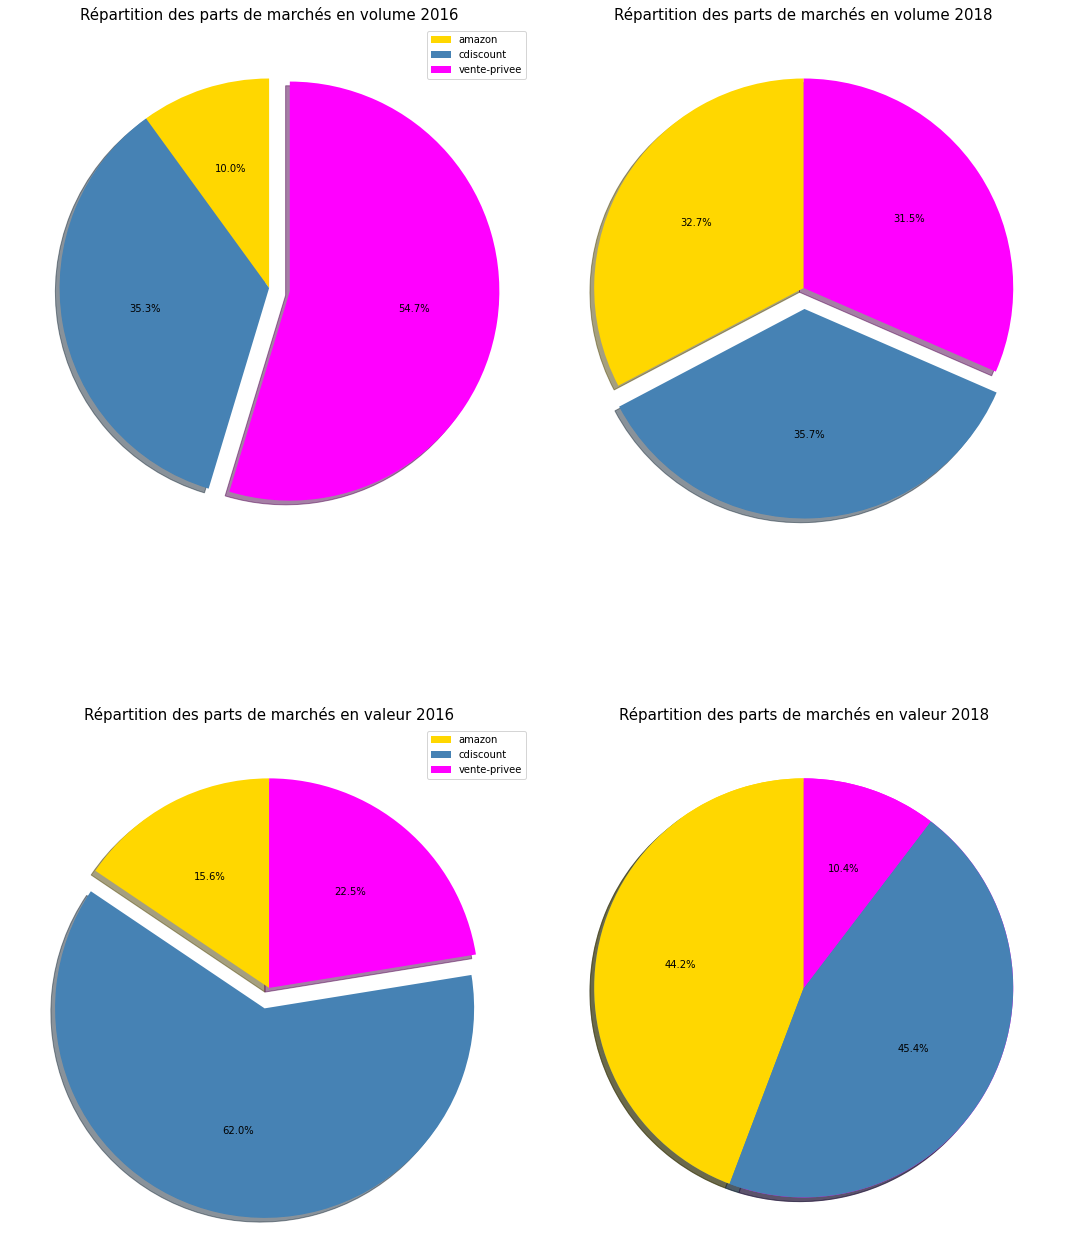

In [54]:
fig = plt.figure(figsize=(15,30))

ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)

colors = ['gold', 'steelblue', 'magenta']
labels = ['amazon','cdiscount','vente-privee']

sizes_1 = df_summary['pdm_vol_16 (%)'][:3]
patches, texts = plt.pie(sizes_1, colors=colors, shadow=True, startangle=90)
explode_1 = (0, 0, 0.1) 
ax1.legend(patches, labels, loc="best")
ax1.set_title('Répartition des parts de marchés en volume 2016',fontsize=15)
ax1.pie(sizes_1, explode=explode_1, colors = colors, autopct='%1.1f%%',shadow=True, startangle=90)

sizes_2 = df_summary['pdm_vol_18 (%)'][:3]
explode_2 = (0, 0.1, 0) 
ax2.set_title('Répartition des parts de marchés en volume 2018',fontsize=15)
ax2.pie(sizes_2, explode=explode_2, colors = colors, autopct='%1.1f%%',shadow=True, startangle=90)

sizes_3 = df_summary['pdm_val_16 (%)'][:3]
explode_3 = (0, 0.1, 0) 
ax3.legend(patches, labels, loc="best")
ax3.set_title('Répartition des parts de marchés en valeur 2016',fontsize=15)
ax3.pie(sizes_3, explode=explode_3, colors = colors, autopct='%1.1f%%',shadow=True, startangle=90)

sizes_4 = df_summary['pdm_val_18 (%)'][:3]
explode_4 = (0, 0, 0) 
ax4.set_title('Répartition des parts de marchés en valeur 2018',fontsize=15)
ax4.pie(sizes_4, explode=explode_4, colors = colors, autopct='%1.1f%%',shadow=True, startangle=90)


plt.savefig('/Users/tangigouez/Desktop/Foxintelligence/Images/market_shares.png')
plt.tight_layout()
plt.show()

Nous pouvons observer une **évolution conséquente des parts de marchés entre 2016 et 2018** des principaux sites marchands sur le catégorie épicerie. 

Tout d'abord, Vente-privée qui dominait le marché en termes d'articles vendus en 2016 (**54,7%**) a vu sa part de marché en volume diminuer de **23,2 points**, au profit d'Amazon qui a gagné **22,7 points** de parts de marchés. Cdiscount de son côté a maintenu ses parts de marché et s'est positionné comme le nouveau leader en termes d'unités vendues (**35,7%**).

En termes de parts de marché en valeur, nous pouvons noter une croissance spectaculaire d'Amazon une nouvelle fois, qui a gagné **28,6 points** entre 2016 et 2018. Sans surprise, Vente-Privée a vu ses parts de marché chuter de **12,1 points**. Cdiscount a également connu une érosion de ses parts de marché (**-16,6 points**) mais maintient sa posture de leader avec **45,4%** du marché, talonné par Amazon avec **44,2%**. 

Globalement, le marché est devenu **plus homogène en 2018**, par rapport à 2016. En effet, sur l'année 2016 un unique acteur détenait **plus de 50% du marché** respectivement Vente-privée en volume et Cdiscount en valeur. Désormais, le leader du marché détient **moins de 50%** et la course pour la tête du classement est très concurrentielle.

Vente-privée est clairement le site marchand **en déclin** sur cette catégorie, au profit d'Amazon qui a connu **la progression la plus spectaculaire** autant en termes de parts de marché en volume que en valeur. Cdiscount est parvenu a **maintenir convenablement** ses parts de marché entre 2016 et 2018, ce qui lui a permis de se positionner comme le **leader du marché en 2018**. Cependant, Amazon semble être l'acteur le plus prometteur sur cette catégorie au regard de son évolution et l'on peut s'attendre à ce qu'il devienne le nouveau leader rapidement.

Pour mieux comprendre l'évolution du marché et entre 2016 et 2018 et les stratégies des sites marchands, étudions à présent les **composants du chiffre d'affaires** pour évaluer l'approche qui aura été la plus payante entre 2016 et 2018: 
- 1) Axer sa croissance sur les gains générés par les **contributions** ; 
- 2) Développer les ventes directes par la création d'une **offre produit propriétaire** et indépendante des vendeurs tiers ;
- 3) Une **offre mixte** qui permet de trouver un équilibre entre les deux sources de revenus.

In [55]:
ventes_directes_16_data = list(df_summary['ventes_directes_16'][:3])
ventes_directes_16_data = [round(num) for num in ventes_directes_16_data]

contributions_16_data = list(df_summary['contributions_16'][:3])
contributions_16_data = [round(num) for num in contributions_16_data]

ventes_directes_18_data = list(df_summary['ventes_directes_18'][:3])
ventes_directes_18_data = [round(num) for num in ventes_directes_18_data]

contributions_18_data = list(df_summary['contributions_18'][:3])
contributions_18_data = [round(num) for num in contributions_18_data]

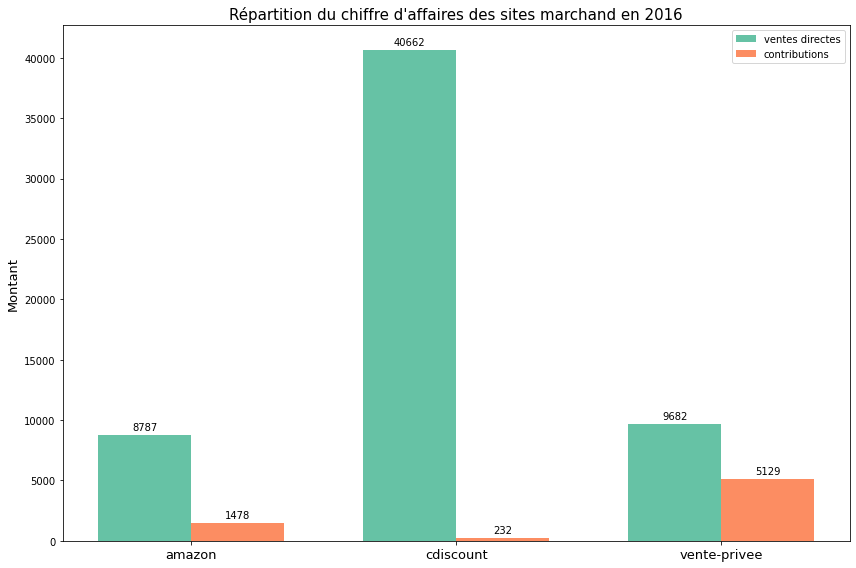

In [56]:
ventes_directes_16 = ventes_directes_16_data
contributions_16 = contributions_16_data

ind = np.arange(len(ventes_directes_16))
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, ventes_directes_16, width,
                label='ventes directes')
rects2 = ax.bar(ind + width/2, contributions_16, width,
                label='contributions')

ax.set_ylabel('Montant',fontsize = 13)
ax.set_title("Répartition du chiffre d'affaires des sites marchand en 2016",fontsize = 15)
ax.set_xticks(ind)
ax.set_xticklabels(('amazon', 'cdiscount', 'vente-privee'),fontsize = 13)
ax.legend()


def autolabel(rects, xpos='center'):
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  
                    textcoords="offset points",  
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "center")
autolabel(rects2, "center")

fig.set_size_inches(12, 8)
plt.savefig('/Users/tangigouez/Desktop/Foxintelligence/Images/turnover_share_2016.png')
fig.tight_layout()

plt.show()

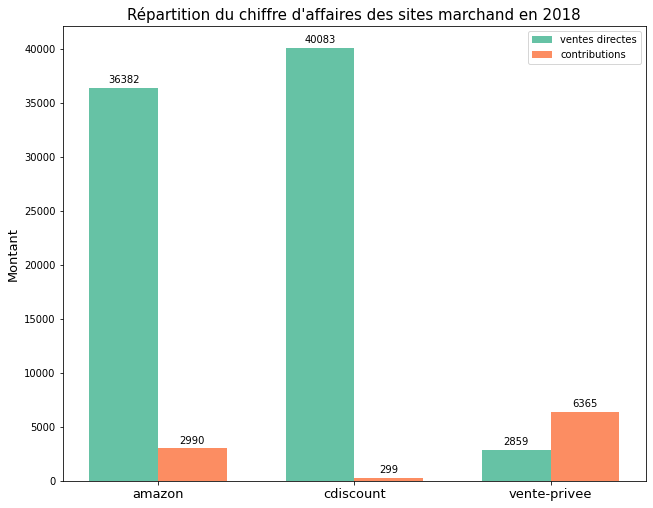

In [57]:
ventes_directes_18 = ventes_directes_18_data
contributions_18 = contributions_18_data

ind = np.arange(len(ventes_directes_18))
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, ventes_directes_18, width,
                label='ventes directes')
rects2 = ax.bar(ind + width/2, contributions_18, width,
                label='contributions')

ax.set_ylabel('Montant',fontsize = 13)
ax.set_title("Répartition du chiffre d'affaires des sites marchand en 2018",fontsize = 15)
ax.set_xticks(ind)
ax.set_xticklabels(('amazon', 'cdiscount', 'vente-privee'),fontsize = 13)
ax.legend()


def autolabel(rects, xpos='center'):
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "center")
autolabel(rects2, "center")

fig.tight_layout()
fig.set_size_inches(12, 8)
plt.savefig('/Users/tangigouez/Desktop/Foxintelligence/Images/turnover_share_2018.png')

plt.show()

En 2016, la part des **ventes directes** dans le chiffre d'affaires des sites marchands est majoritaire. Les **contributions** ne consitituent qu'une faible part du chiffre d'affaires d'Amazon et Cdiscount, alors que le chiffre d'affaires de vente-privée et plus équilibré. 

En 2018, vente-privée a vu la part des contributions devenir majoritaire dans son chiffre d'affaires, alors que les 2 autres sites marchands ont poursuivi la **même stratégie que en 2016**. L'approche mixte adoptée par vente-privée s'est donc avérée **moins payante**.

## **2.2. Question 2** : *Quel est le prix moyen par article sur la sous-catégorie ‘vins’ pour chaque marchand ?*

Pour répondre à cette question, nous allons nous appuyer sur les colonnes suivantes du dataset d'origine : *order_item_total_price_paid* et *total_order_item_quantity_per_order*. **Nous ne prendrons pas en compte les contributions dans le calcul** pour nous focaliser uniquement sur les prix des articles pratiqués par les vendeurs sur chaque site marchands, indépendemment de la politique de contributions de ces derniers. 

L'objectif est donc de distinguer le site marchand le plus adapté à la vente d'un article **selon sa gamme de prix**, correspondant à une cible client bien définie.

In [58]:
wine_items = data[data['category_2']=='vin']
wine_items['item_indiv_price'] = wine_items['order_item_total_price_paid']/wine_items['total_order_item_quantity_per_order']
df_summary_1 = wine_items.groupby('merchant_name')['item_indiv_price'].mean().reset_index().rename(columns={'item_indiv_price':'prix_moyen_par_article'})

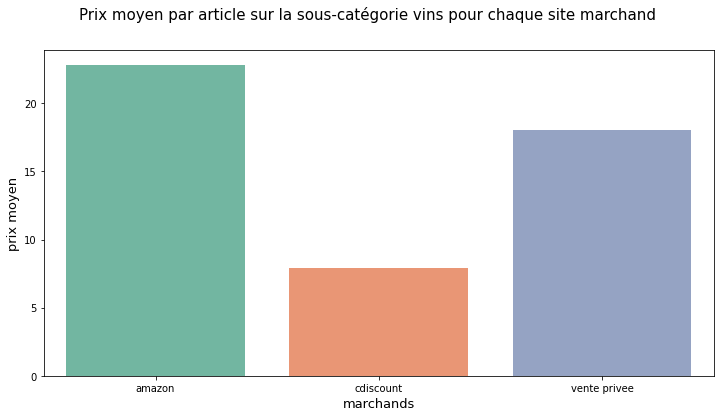

In [59]:
plt.figure(figsize=(12,6))
fig = sns.barplot(x="merchant_name", y="prix_moyen_par_article", data=df_summary_1)
fig.figure.suptitle("Prix moyen par article sur la sous-catégorie vins pour chaque site marchand", fontsize = 15) 
plt.xlabel('marchands', fontsize=13) 
plt.ylabel('prix moyen', fontsize=13) 
plt.savefig('/Users/tangigouez/Desktop/Foxintelligence/Images/avg_price_per_wine_category.png')
plt.show()

In [60]:
df_summary_1

,merchant_name,prix_moyen_par_article
0,amazon,22.800336
1,cdiscount,7.886705
2,vente privee,18.064198


Amazon est le site marchand qui pratique les prix les plus élevés sur la sous-catégorie vin avec un prix moyen par article de **22,80€**, suivi de vente-privée avec **18,06€**. A l'opposé nous retrouvons Cdiscount qui dispose d'un prix moyen par article de **7,88€**. 

Vente-privée se retrouve donc intercalé entre deux extrêmes : Amazon et Cdiscount. Ces deux derniers ont un positionnement clair en termes de prix et par conséquent parviennent certainement à mieux toucher des segments de clients précis dans leurs offres.

## **2.3. Question 3** : *Calculez la part de portefeuille des cohortes de clients Vente Privée 2016 et Vente Privée 2018. Quelles conclusions peut-on tirer ?*

La part de portefeuille est le montant qu'un client existant dépense régulièrement pour une marque en particulier plutôt qu'auprès de marques concurrentes sur le même type de produit. Globalement, il s'agit de la **"part" concurrentielle d'une marque** par rapport à l'argent disponible qu'un consommateur a choisi de dépenser pour cette catégorie de produit.

Par exemple, imaginez qu'un consommateur alloue 100 euros par mois à l'achat de détergents et qu'il ait besoin d'un nouveau flacon de détergent toutes les deux semaines. Deux marques concurrentes se disputent le budget disponible de ce consommateur et font payer 50 euros pour une bouteille de détergent. Si le consommateur achète une marque au début du mois et l'autre deux semaines plus tard, les deux marques ont une part de portefeuille de 50 % pour ce mois en particulier.

Augmenter la part de portefeuille d'un client individuel peut être **aussi rentable que d'essayer d'attirer de nouveaux clients**. C'est pourquoi les entreprises s'attachent souvent à augmenter la part de portefeuille de leurs clients réguliers autant, voire plus, qu'à en gagner de nouveaux. 

Pour réaliser ce calcul, nous allons nous appuyer sur les colonnes : *is_customer_merchant_name_year*. Celles ci nous permettent d'identifier si **l'auteur d'une commande est client sur plusieurs sites marchands à la fois** et de définir lesquels en particulier. Pour répondre à la question, nous allons **filtrer les articles commandés qui concernent des clients de vente-privée en 2016 et en 2018**. Nous allons ensuite calculer la **proportion de leurs dépenses réalisées respectivement chez Amazon, Cdiscount et Vente-Privée** à partir des colonnes *merchant_name* (site marchand sur lequel ils ont réalisé une commande) et *order_item_total_price_paid_with_contributions* (qui nous indique le montant des dépenses).

In [61]:
vp_16_cohort = data[data['is_customer_venteprivee_2016'] == 1.0]
sow_vp_16 = (vp_16_cohort.groupby('merchant_name')['order_item_total_price_paid_with_contributions'].sum()/vp_16_cohort['order_item_total_price_paid_with_contributions'].sum())*100

In [62]:
vp_18_cohort = data[data['is_customer_venteprivee_2018'] == 1.0]
sow_vp_18 = (vp_18_cohort.groupby('merchant_name')['order_item_total_price_paid_with_contributions'].sum()/vp_18_cohort['order_item_total_price_paid_with_contributions'].sum())*100

In [63]:
index_rows = ['amazon','cdiscount','vente-privee']
sow_vp_16 = list(sow_vp_16)
sow_vp_16 = [round(num,2) for num in sow_vp_16]
sow_vp_18 = list(sow_vp_18)
sow_vp_18 = [round(num,2) for num in sow_vp_18]

df_summary_2 = pd.DataFrame({ 'marchands' : index_rows,
                            'part de portefeuille vente privee 2016' : sow_vp_16,
                             'part de portefeuille vente privee 2018' : sow_vp_18
                           })

In [64]:
df_summary_2

,marchands,part de portefeuille vente privee 2016,part de portefeuille vente privee 2018
0,amazon,8.71,9.89
1,cdiscount,8.90,9.82
2,vente-privee,82.39,80.29


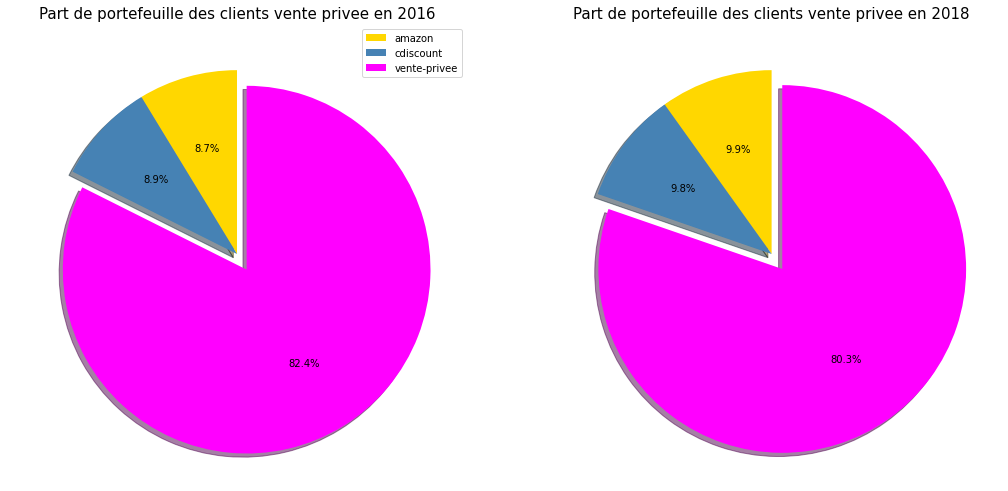

In [65]:
fig = plt.figure(figsize=(15,20))

ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)

colors = ['gold', 'steelblue', 'magenta']
labels = ['amazon','cdiscount','vente-privee']
explode = (0, 0, 0.1) 

sizes_1 = df_summary_2['part de portefeuille vente privee 2016']
ax1.legend(patches, labels, loc="best")
ax1.set_title('Part de portefeuille des clients vente privee en 2016',fontsize=15)
ax1.pie(sizes_1, explode=explode, colors = colors, autopct='%1.1f%%',shadow=True, startangle=90)

sizes_2 = df_summary_2['part de portefeuille vente privee 2018']
explode_2 = (0, 0, 0.1) 
ax2.set_title('Part de portefeuille des clients vente privee en 2018',fontsize=15)
ax2.pie(sizes_2, explode=explode, colors = colors, autopct='%1.1f%%',shadow=True, startangle=90)

plt.savefig('/Users/tangigouez/Desktop/Foxintelligence/Images/share_of_wallet_vp_16_18.png')
plt.tight_layout()
plt.show()

Nous pouvons constater que la part de portefeuille de Vente-privée a perdu **2,1 points entre 2016 et 2018**, au profit de Amazon et Cdiscount. Par conséquent, on peut en déduire que vente-privée a perdu en fidélisation clientèle. 

Cette baisse est potentiellement lié à une **diminution de la satisfaction des clients de vente-privée** et à l'**évolution de l'offre de la concurrence entre 2016 et 2018**, qui a convaincu les clients de vente-privée d'y allouer une part plus importante de leur budget dédié aux produits de la catégorie épicerie.

## **2.4. Bonus**

Pour aller plus loin, nous pouvons analyser de plus près les composantes de la croissance des ventes en ligne que nous pouvons résumer en l'équation suivante : 

**Ventes en ligne = Nombre de cyber-acheteurs x Nombre de transactions annuelles par cyber-acheteurs x Panier moyen par transaction.**

Etudions ces paramètres pour chacun des sites marchands afin de mieux comprendre l'évolution du marché entre 2016 et 2018.

### 2.4.1. Etude du panier moyen par commande sur chaque site marchand

Nous allons nous intéresser dans cette partie aux dépenses moyennes réalisées par commande sur chacun des sites marchands. Pour réaliser le calcul des dépenses, nous allons nous appuyer sur la colonne suivante : *order_item_total_price_paid*, soit indépendemment de la politique de contribution.

In [66]:
amz_16_avg_basket = amz_16.groupby('id_order')['order_item_total_price_paid'].sum().mean()
amz_18_avg_basket = amz_18.groupby('id_order')['order_item_total_price_paid'].sum().mean()
cdisc_16_avg_basket = cdisc_16.groupby('id_order')['order_item_total_price_paid'].sum().mean()
cdisc_18_avg_basket = cdisc_18.groupby('id_order')['order_item_total_price_paid'].sum().mean()
vp_16_avg_basket = vp_16.groupby('id_order')['order_item_total_price_paid'].sum().mean()
vp_18_avg_basket = vp_18.groupby('id_order')['order_item_total_price_paid'].sum().mean()

In [67]:
avg_basket_16 = []
avg_basket_18 = []

avg_basket_16.extend((amz_16_avg_basket,cdisc_16_avg_basket,vp_16_avg_basket))
avg_basket_18.extend((amz_18_avg_basket,cdisc_18_avg_basket,vp_18_avg_basket))

df_summary_3 = pd.DataFrame({ 'marchands' : index_rows,
                            'panier moyen par commande 2016' : avg_basket_16,
                             'panier moyen par commande 2018' : avg_basket_18
                           })

In [68]:
df_summary_3['variation(%)'] = ((df_summary_3['panier moyen par commande 2018'] - df_summary_3['panier moyen par commande 2016'])/(df_summary_3['panier moyen par commande 2016'])*100)

In [69]:
df_summary_3

,marchands,panier moyen par commande 2016,panier moyen par commande 2018,variation(%)
0,amazon,39.272438,32.538693,-17.146235
1,cdiscount,70.466557,69.598190,-1.232311
2,vente-privee,65.886336,64.298210,-2.410403


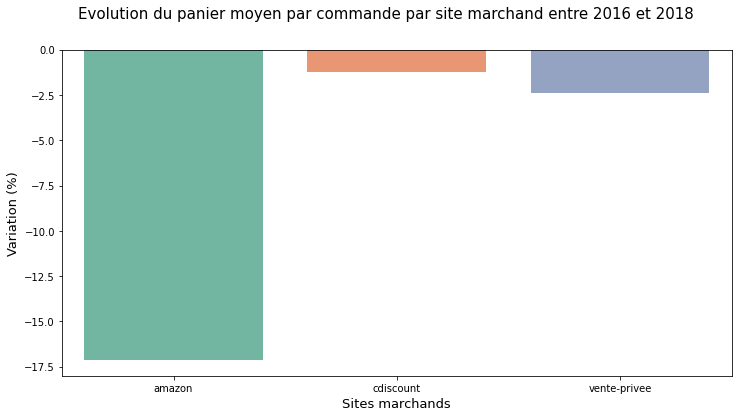

In [70]:
plt.figure(figsize=(12,6))
fig = sns.barplot(x='marchands', y='variation(%)', data=df_summary_3)
fig.figure.suptitle("Evolution du panier moyen par commande par site marchand entre 2016 et 2018", fontsize = 15) 
plt.xlabel('Sites marchands',fontsize = 13)
plt.ylabel('Variation (%)',fontsize = 13)
plt.savefig('/Users/tangigouez/Desktop/Foxintelligence/Images/avg_basket_var.png')
plt.show()

### 2.4.2. Etude du nombre de transactions par site marchand

In [71]:
amz_16_n_transactions = len(amz_16.groupby('id_order'))
amz_18_n_transactions = len(amz_18.groupby('id_order'))
cdisc_16_n_transactions = len(cdisc_16.groupby('id_order'))
cdisc_18_n_transactions = len(cdisc_18.groupby('id_order'))
vp_16_n_transactions = len(vp_16.groupby('id_order'))
vp_18_n_transactions = len(vp_18.groupby('id_order'))

In [72]:
n_transactions_16 = []
n_transactions_18 = []

n_transactions_16.extend((amz_16_n_transactions,cdisc_16_n_transactions,vp_16_n_transactions))
n_transactions_18.extend((amz_18_n_transactions,cdisc_18_n_transactions,vp_18_n_transactions))

df_summary_4 = pd.DataFrame({ 'marchands' : index_rows,
                            'Nombre de transactions 2016' : n_transactions_16,
                             'Nombre de transactions 2018' : n_transactions_18
                           })

In [73]:
df_summary_4['variation(%)'] = ((df_summary_4['Nombre de transactions 2018'] - df_summary_4['Nombre de transactions 2016'])/(df_summary_4['Nombre de transactions 2016'])*100)

In [74]:
df_summary_4

,marchands,Nombre de transactions 2016,Nombre de transactions 2018,variation(%)
0,amazon,566,2189,286.749117
1,cdiscount,607,663,9.225700
2,vente-privee,1171,1341,14.517506


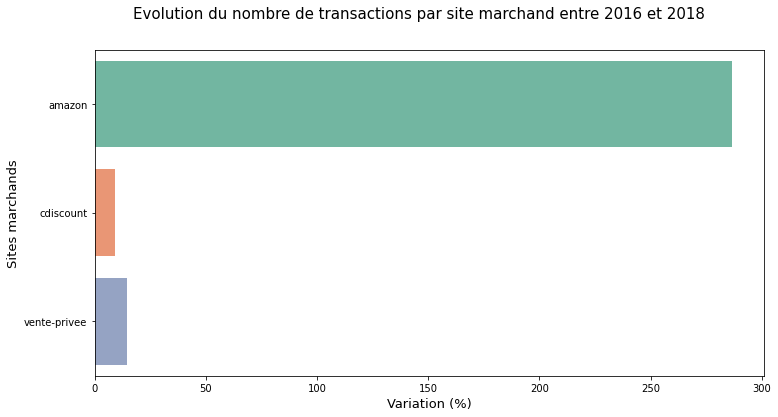

In [75]:
plt.figure(figsize=(12,6))
fig = sns.barplot(x='variation(%)', y='marchands', data=df_summary_4)
fig.figure.suptitle("Evolution du nombre de transactions par site marchand entre 2016 et 2018", fontsize = 15) 
plt.xlabel('Variation (%)',fontsize = 13)
plt.ylabel('Sites marchands',fontsize = 13)
plt.savefig('/Users/tangigouez/Desktop/Foxintelligence/Images/n_transactions_var.png')
plt.show()

### 2.4.3. Etude du nombre moyen d'articles par commande sur chaque site marchand

In [76]:
avg_items_order_amz_16 = round(float(amz_16.groupby('id_order')['total_order_item_quantity_per_order'].unique().mean()),2)
avg_items_order_cdisc_16 = round(float(cdisc_16.groupby('id_order')['total_order_item_quantity_per_order'].unique().mean()),2)
avg_items_order_vp_16 = round(float(vp_16.groupby('id_order')['total_order_item_quantity_per_order'].unique().mean()),2)
avg_items_order_amz_18 = round(float(amz_18.groupby('id_order')['total_order_item_quantity_per_order'].unique().mean()),2)
avg_items_order_cdisc_18 = round(float(cdisc_18.groupby('id_order')['total_order_item_quantity_per_order'].unique().mean()),2)
avg_items_order_vp_18 = round(float(vp_18.groupby('id_order')['total_order_item_quantity_per_order'].unique().mean()),2)

In [77]:
avg_items_order_16 = []
avg_items_order_18 = []

avg_items_order_16.extend((avg_items_order_amz_16,avg_items_order_cdisc_16,avg_items_order_vp_16))
avg_items_order_18.extend((avg_items_order_amz_18,avg_items_order_cdisc_18,avg_items_order_vp_18))

df_summary_5 = pd.DataFrame({ 'marchands' : index_rows,
                            "Nombre moyen d'articles par commande 2016" : avg_items_order_16,
                             "Nombre moyen d'articles par commande 2018" : avg_items_order_18
                           })

In [78]:
df_summary_5['variation(%)'] = ((df_summary_5["Nombre moyen d'articles par commande 2018"] - df_summary_5["Nombre moyen d'articles par commande 2016"])/(df_summary_5["Nombre moyen d'articles par commande 2016"])*100)

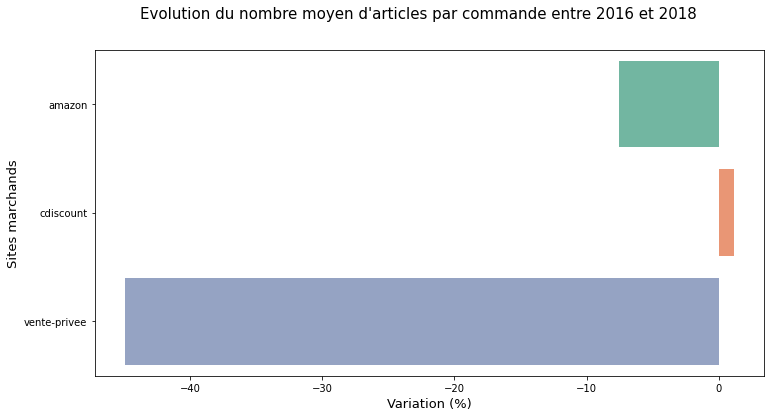

In [79]:
plt.figure(figsize=(12,6))
fig = sns.barplot(x="variation(%)", y='marchands', data=df_summary_5)
fig.figure.suptitle("Evolution du nombre moyen d'articles par commande entre 2016 et 2018", fontsize = 15) 
plt.xlabel("Variation (%)",fontsize = 13)
plt.ylabel('Sites marchands',fontsize = 13)
plt.savefig('/Users/tangigouez/Desktop/Foxintelligence/Images/avg_item_order_var.png')
plt.show()

### 2.4.4. Etude de la politique de contribution par article commandé par site marchand

In [80]:
avg_contribution_amz_16 = amz_16['coef_contributions (%)'].mean()
avg_contribution_amz_18 = amz_18['coef_contributions (%)'].mean()
avg_contribution_cdisc_16 = cdisc_16['coef_contributions (%)'].mean()
avg_contribution_cdisc_18 = cdisc_18['coef_contributions (%)'].mean()
avg_contribution_vp_16 = vp_16['coef_contributions (%)'].mean()
avg_contribution_vp_18 = vp_18['coef_contributions (%)'].mean()

In [81]:
avg_contribution_16 = []
avg_contribution_18 = []

avg_contribution_16.extend((avg_contribution_amz_16,avg_contribution_cdisc_16,avg_contribution_vp_16))
avg_contribution_18.extend((avg_contribution_amz_18,avg_contribution_cdisc_18,avg_contribution_vp_18))

df_summary_6 = pd.DataFrame({ 'marchands' : index_rows,
                            "% de contribution moyen 2016" : avg_contribution_16,
                             "% de contribution moyen 2018" : avg_contribution_18
                           })

In [82]:
df_summary_6['variation'] = df_summary_6["% de contribution moyen 2018"] - df_summary_6["% de contribution moyen 2016"]

In [83]:
df_summary_6

,marchands,% de contribution moyen 2016,% de contribution moyen 2018,variation
0,amazon,8.552486,4.989258,-3.563228
1,cdiscount,3.765610,3.320941,-0.444669
2,vente-privee,8.886545,8.635047,-0.251497


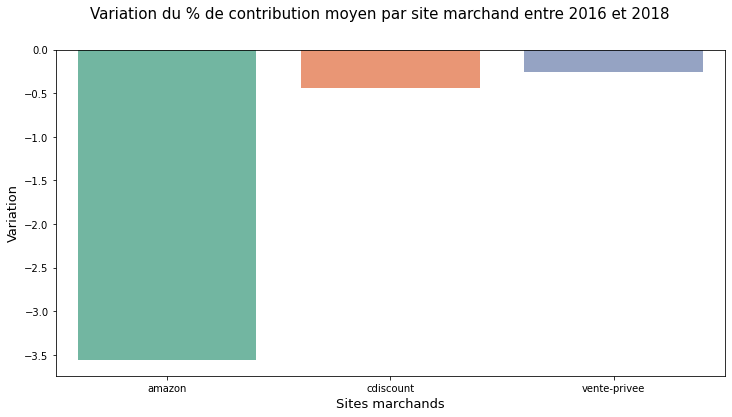

In [84]:
plt.figure(figsize=(12,6))
fig = sns.barplot(x="marchands", y='variation', data=df_summary_6)
fig.figure.suptitle("Variation du % de contribution moyen par site marchand entre 2016 et 2018", fontsize = 15) 
plt.xlabel("Sites marchands",fontsize = 13)
plt.ylabel('Variation',fontsize = 13)
plt.savefig('/Users/tangigouez/Desktop/Foxintelligence/Images/avg_contribution_var.png')
plt.show()